In [249]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [250]:
df = pd.read_csv('Landslide Civildf_new.csv')
df.head()

,Unnamed: 0,Timestamp,Rainfall,Water level,Inc30mup,Inc30mdown,Inc20mup,Inc20mdown,Inc10mup,Inc10mdown,1stTensiometer,2ndTensiometer,3rdTensiometer,4thTensiometer,5thTensiometer
0,0,01-12-2022 01:00,0.0,-177.753910,24.520339,31.058241,16.023206,26.345443,20.637553,25.830825,-48.832508,-49.926434,181.57994,-3.156536,-48.597010
1,1,01-12-2022 02:00,0.0,-104.417316,26.093114,37.702314,15.116429,36.349078,20.836093,29.274305,-48.868384,-49.929076,181.60057,-3.142777,-48.629946
2,2,01-12-2022 03:00,0.0,-158.065690,29.426647,27.552242,20.673672,31.637946,20.879557,26.278678,-48.895732,-49.930162,181.61358,-3.129418,-48.652374
3,3,01-12-2022 04:00,0.0,-189.458110,30.382570,34.624852,21.397603,27.999477,22.426564,25.463844,-48.914294,-49.932082,181.61197,-3.137719,-48.671676
4,4,01-12-2022 05:00,0.0,-197.408960,25.493729,29.837320,18.103459,31.207890,23.932405,28.861409,-48.914736,-49.932394,181.62403,-3.137719,-48.673116


In [251]:
print (df.columns)

Index(['Unnamed: 0', 'Timestamp', 'Rainfall', 'Water level', 'Inc30mup',
       'Inc30mdown ', 'Inc20mup ', 'Inc20mdown', 'Inc10mup', 'Inc10mdown',
       '1stTensiometer', '2ndTensiometer', '3rdTensiometer ', '4thTensiometer',
       '5thTensiometer'],
      dtype='object')


In [252]:
df=df.drop(columns=['Unnamed: 0'])

In [253]:
# Assuming df is your DataFrame and 'Timestamp' is the column containing date strings
# Swap day and month in the date strings
df['Timestamp'] = df['Timestamp'].str.replace(r'(\d{2})-(\d{2})-(\d{4})', r'\2-\1-\3', regex=True)

# Now, convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m-%d-%Y %H:%M')

# Now you should be able to work with the 'Timestamp' column as datetime objects


In [254]:
df = df.fillna(df.mean())


In [255]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
num_cols=['Rainfall', 'Water level', 'Inc30mup',
       'Inc30mdown ', 'Inc20mup ', 'Inc20mdown', 'Inc10mup', 'Inc10mdown',
       '1stTensiometer', '2ndTensiometer', '3rdTensiometer ', '4thTensiometer',
       '5thTensiometer']
df[num_cols] = scaler.fit_transform(df[num_cols])


In [256]:
# Convert datetime64[ns] to int64 (nanoseconds since the epoch)
df['Timestamp'] = pd.to_datetime(df['Timestamp']).astype('int64')

# Now you can convert int64 to the desired dtype, such as int32
df['Timestamp'] = (df['Timestamp'] / 10**9).astype('int32')  # Convert nanoseconds to seconds (divide by 10^9)


In [257]:
features_inc = df[['Rainfall', 'Water level', 'Inc30mup',
       'Inc30mdown ', 'Inc20mup ', 'Inc20mdown', 'Inc10mup', 'Inc10mdown',
       '1stTensiometer', '2ndTensiometer', '3rdTensiometer ', '4thTensiometer',
       '5thTensiometer']]
features_ms = df[['Timestamp', 'Rainfall']]


In [258]:
features_inc = features_inc.values.reshape((features_inc.shape[0], 1, features_inc.shape[1]))
features_ms = features_ms.values.reshape((features_ms.shape[0], 1, features_ms.shape[1]))


In [259]:
from sklearn.model_selection import train_test_split

target_inc = df['Inc30mdown ']
target_ms = df['1stTensiometer']
X_train_inc, X_test_inc, y_train_inc, y_test_inc = train_test_split(features_inc, target_inc, test_size=0.25, random_state=42)

X_train_ms, X_test_ms, y_train_ms, y_test_ms = train_test_split(features_ms, target_ms, test_size=0.25, random_state=42)


In [260]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense

#Bi-directional LSTM model
model1 = Sequential()
model1.add(Bidirectional(LSTM(units=1, return_sequences=True), input_shape=(X_train_inc.shape[1], X_train_inc.shape[2])))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mean_squared_error')

# Train
model1.fit(X_train_inc, y_train_inc, epochs=200, batch_size=32)


Epoch 1/200
17/17 [==============================] - 4s 3ms/step - loss: 0.4669
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3948
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3402
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2970
Epoch 5/200
17/17 [==============================] - 0s 5ms/step - loss: 0.2579
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2183
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1760
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1345
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0964
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 11/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0462
Epoch 12/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0336
Epoch 13/200
17/17 [=================

In [261]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense

#Bi-directional LSTM model
model2 = Sequential()
model2.add(Bidirectional(LSTM(units=3, return_sequences=True), input_shape=(X_train_inc.shape[1], X_train_inc.shape[2])))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mean_squared_error')

# Train
model2.fit(X_train_inc, y_train_inc, epochs=200, batch_size=32)


Epoch 1/200
17/17 [==============================] - 6s 3ms/step - loss: 0.2286
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1552
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1022
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0671
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0449
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0320
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0243
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0193
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0156
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 12/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 13/200
17/17 [=================

In [262]:
#Predictions
y_pred_inc1 = model1.predict(X_test_inc)
y_pred_inc2 = model2.predict(X_test_inc)



6/6 [==============================] - 1s 2ms/step


In [263]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

# Reshape y_pred_inc to 2D
y_pred_inc_21d = np.reshape(y_pred_inc1, (y_pred_inc1.shape[0], y_pred_inc1.shape[2]))

y_pred_inc_22d = np.reshape(y_pred_inc2, (y_pred_inc2.shape[0], y_pred_inc2.shape[2]))

#mean squared error
mse1 = mean_squared_error(y_test_inc, y_pred_inc_21d)
print('Mean Squared Error1:', mse1)
mse2 = mean_squared_error(y_test_inc, y_pred_inc_22d)
print('Mean Squared Error2:', mse2)
r21 = r2_score(y_test_inc, y_pred_inc_21d)
print('R-squared Score1:', r21)
r22 = r2_score(y_test_inc, y_pred_inc_22d)
print('R-squared Score2:', r22)

Mean Squared Error1: 0.001527144963384595
Mean Squared Error2: 0.00026752877055730704
R-squared Score1: 0.9692438995547814
R-squared Score2: 0.994612075515732


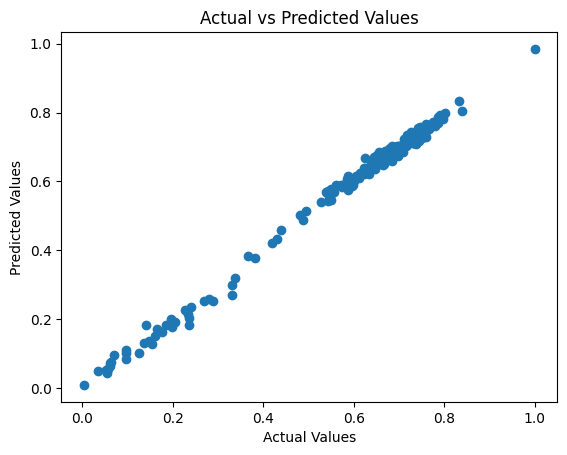

In [264]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(y_test_inc, y_pred_inc_22d)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


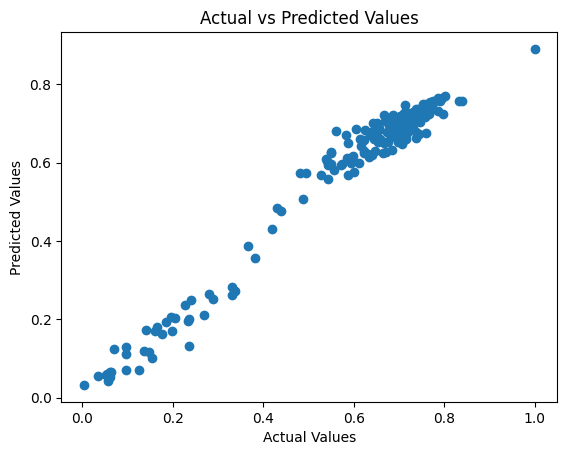

In [265]:
plt.scatter(y_test_inc, y_pred_inc_21d)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


C:\Users\aryam\AppData\Local\Temp\ipykernel_28900\3039695990.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlBu')


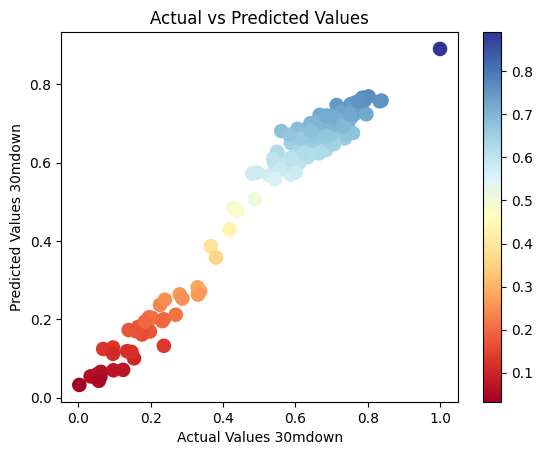

In [266]:
import matplotlib.pyplot as plt
import numpy as np
cmap = plt.cm.get_cmap('RdYlBu')
norm = plt.Normalize(y_pred_inc_21d.min(), y_pred_inc_21d.max())
sc = plt.scatter(y_test_inc, y_pred_inc_21d, c=y_pred_inc_21d, cmap=cmap, norm=norm, s=90)  # s parameter changes the size of dots
plt.colorbar(sc)
plt.xlabel('Actual Values 30mdown')
plt.ylabel('Predicted Values 30mdown')
plt.title('Actual vs Predicted Values')
plt.show()


Epoch 1/200
17/17 [==============================] - 5s 3ms/step - loss: 0.3333
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2887
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2492
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2142
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1830
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1551
Epoch 7/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1307
Epoch 8/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1087
Epoch 9/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0904
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0745
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0614
Epoch 12/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0513
Epoch 13/200
17/17 [=================

C:\Users\aryam\AppData\Local\Temp\ipykernel_28900\3628932583.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlBu')


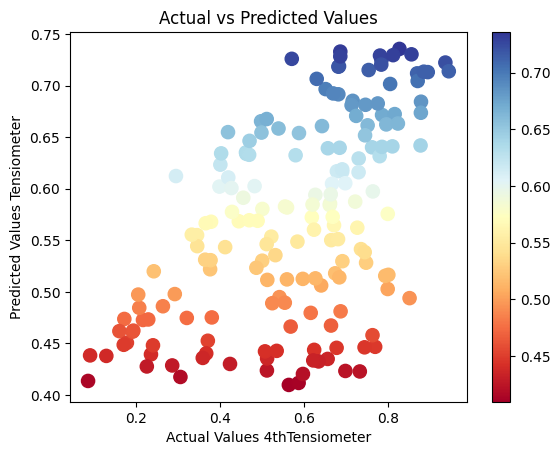

In [267]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense

# Data preprocessing
scaler = MinMaxScaler()
n_samples, n_timesteps, n_features = features_ms.shape
features_ms_2d = features_ms.reshape((n_samples * n_timesteps, n_features))
scaled_features_ms = scaler.fit_transform(features_ms_2d)
scaled_features_ms = scaled_features_ms.reshape((n_samples, n_timesteps, n_features))

target_ms = df['4thTensiometer']
X_train_ms, X_test_ms, y_train_ms, y_test_ms = train_test_split(scaled_features_ms, target_ms, test_size=0.25, random_state=42)

# Model architecture
model = Sequential()
model.add(Bidirectional(LSTM(units=3, return_sequences=True), input_shape=(X_train_ms.shape[1], X_train_ms.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_ms, y_train_ms, epochs=200, batch_size=32)

# Make predictions
y_pred_ms = model.predict(X_test_ms)

# Reshape predictions
y_pred_ms_2d = np.reshape(y_pred_ms, (y_pred_ms.shape[0], y_pred_ms.shape[2]))

# Evaluate the model
mse = mean_squared_error(y_test_ms, y_pred_ms_2d)
r2 = r2_score(y_test_ms, y_pred_ms_2d)
print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

# Plot the results
cmap = plt.cm.get_cmap('RdYlBu')
norm = plt.Normalize(y_pred_ms_2d.min(), y_pred_ms_2d.max())
sc = plt.scatter(y_test_ms, y_pred_ms_2d, c=y_pred_ms_2d, cmap=cmap, norm=norm, s=90)  # s parameter changes the size of dots
plt.colorbar(sc)
plt.xlabel('Actual Values 4thTensiometer')
plt.ylabel('Predicted Values Tensiometer')
plt.title('Actual vs Predicted Values')
plt.show()
